<a href="https://colab.research.google.com/github/saharalwadei/DissertationLab/blob/main/Function_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Global variables for the program


In [6]:
N_points = 500 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 2 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-3,0,1) ]) # Alpha (regularization strength) of ridge regression
lasso_eps = 0.001
lasso_nalpha=20
lasso_iter=1000
degree_min = 2
degree_max = 8

### Generate feature and output vector following a non-linear function


$The\ ground\ truth\ or\ originating\ function\ is\ as\ follows:\$

$y=f(x)= x^2.sin(x).e^{-0.1x}+\psi(x)$


$: \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

In [7]:
x_smooth = np.array(np.linspace(x_min,x_max,501))

In [8]:
# Linearly spaced sample points
X=np.array(np.linspace(x_min,x_max,N_points))

# Samples drawn from uniform random distribution
X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)

In [9]:
def func(x):
    result = (20*x+3*x**2+0.1*x**3)*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

In [10]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [11]:
y = func(X)+noise_x
y_sampled = func(X_sample)+noise_x

In [14]:
df = pd.DataFrame(data=X,columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=X_sample
df['y_sampled']=y_sampled
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.000000,17.588211,17.681010,3.319960,-13.034939
1,1.018036,18.122428,15.374198,1.220888,21.422887
2,1.036072,18.658563,17.956261,4.928107,-110.139524
3,1.054108,19.196234,15.042340,4.609903,-108.136014
4,1.072144,19.735056,18.650991,1.621519,33.517093


### Plot the function(s), both the ideal characteristic and the observed output (with process and observation noise)

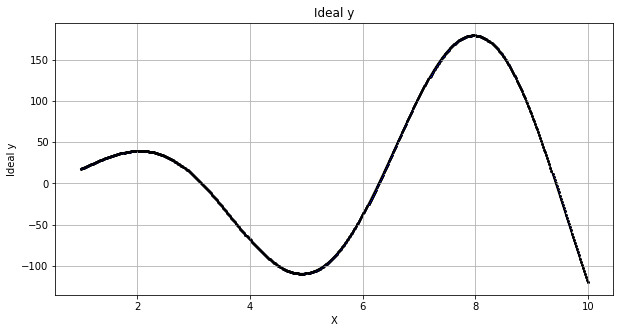

In [15]:
df.plot.scatter('X','Ideal y',title='Ideal y',grid=True,edgecolors=(0,0,0),c='blue',s=4,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

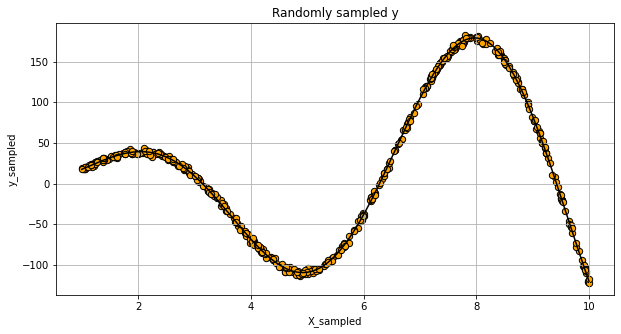

In [16]:
df.plot.scatter('X_sampled',y='y_sampled',title='Randomly sampled y',
                grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

### More Libraries

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Neural network for regression
### Import and declaration of variables

In [18]:
import tensorflow as tf

In [19]:
learning_rate = 0.000001
training_epochs = 20000

n_input = 1  # Number of features
n_output = 1  # Regression output is a number only

n_hidden_layer = 35 # layer number of features

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)

X_train=X_train.values.reshape(X_train.size,1)
y_train=y_train.values.reshape(y_train.size,1)
X_test=X_test.values.reshape(X_test.size,1)
y_test=y_test.values.reshape(y_test.size,1)

from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
y_scaled = preprocessing.scale(y_train)

In [21]:
X_scaled.shape

(335, 1)

In [35]:
# Imports
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import Adam
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(25, activation='linear', input_dim=1))
#model.add(Dropout(.2))
model.add(Dense(25, activation='linear'))
#model.add(Dropout(.1))
model.add(Dense(25, activation='linear'))
model.add(Dense(25, activation='linear'))
model.add(Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam()

# Compiling the model
#sgd = SGD(lr=0.001, decay=0, momentum=0.9, nesterov=True)
model.compile(loss = 'mean_squared_error', optimizer=optimizer)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 25)                50        
                                                                 
 dense_26 (Dense)            (None, 25)                650       
                                                                 
 dense_27 (Dense)            (None, 25)                650       
                                                                 
 dense_28 (Dense)            (None, 25)                650       
                                                                 
 dense_29 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,026
Trainable params: 2,026
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_scaled, y_scaled, epochs=2000, verbose=0)

In [37]:
score = model.evaluate(X_test, y_test)
score

6/6 [==============================] - 0s 2ms/step - loss: 8093.6196


8093.61962890625

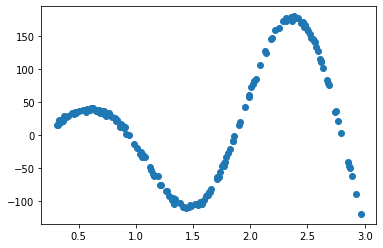

In [38]:
yhat=model.predict(X_test)
plt.scatter(yhat,y_test)

In [42]:
# Creating a model
from keras.models import Sequential
from keras.layers import Dense

# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return tf.math.sin(x)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

# Usage
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation(custom_activation, name='SpecialActivation'))
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                25120     
                                                                 
 SpecialActivation (Activati  (None, 32)               0         
 on)                                                             
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
# Building the model
model = Sequential()
model.add(Dense(25, activation='custom_activation', input_dim=1))
#model.add(Dropout(.2))
model.add(Dense(25, activation='custom_activation'))
#model.add(Dropout(.1))
model.add(Dense(25, activation='custom_activation'))
#model.add(Dense(25, activation='custom_activation'))
model.add(Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam()

# Compiling the model
#sgd = SGD(lr=0.001, decay=0, momentum=0.9, nesterov=True)
model.compile(loss = 'mean_absolute_percentage_error', optimizer=optimizer)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 25)                50        
                                                                 
 dense_58 (Dense)            (None, 25)                650       
                                                                 
 dense_59 (Dense)            (None, 25)                650       
                                                                 
 dense_60 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,376
Trainable params: 1,376
Non-trainable params: 0
_________________________________________________________________


6/6 [==============================] - 0s 3ms/step - loss: 102.7576


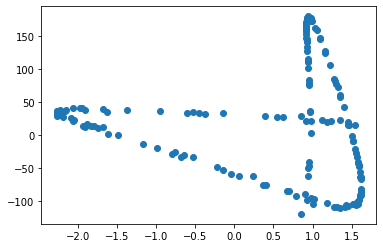

In [57]:
model.fit(X_scaled, y_scaled, epochs=1000, verbose=0)
score = model.evaluate(X_test, y_test)
yhat=model.predict(X_test)
plt.scatter(yhat,y_test)

In [58]:
score

102.75761413574219